In [1]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# b. Load the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
# c. Define the network architecture
model = Sequential([
    Input(shape=(28, 28)),          # Explicit Input layer
    Flatten(),                       # Flatten layer
    Dense(128, activation='relu'),   # Hidden layer
    Dense(64, activation='relu'),    # Hidden layer
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model **after building**
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:

# d. Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7374 - loss: 0.9855 - val_accuracy: 0.8816 - val_loss: 0.4478
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8870 - loss: 0.4067 - val_accuracy: 0.9082 - val_loss: 0.3359
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9060 - loss: 0.3323 - val_accuracy: 0.9166 - val_loss: 0.2969
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9152 - loss: 0.2965 - val_accuracy: 0.9239 - val_loss: 0.2680
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9221 - loss: 0.2711 - val_accuracy: 0.9272 - val_loss: 0.2528
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9279 - loss: 0.2520 - val_accuracy: 0.9333 - val_loss: 0.2341
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9329 - loss: 0.2357 - val_accuracy: 0.9371 - val_loss: 0.2228
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9370 - loss: 0.2218 - val_accuracy:

In [5]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1335
Test Loss: 0.1335
Test Accuracy: 0.9596


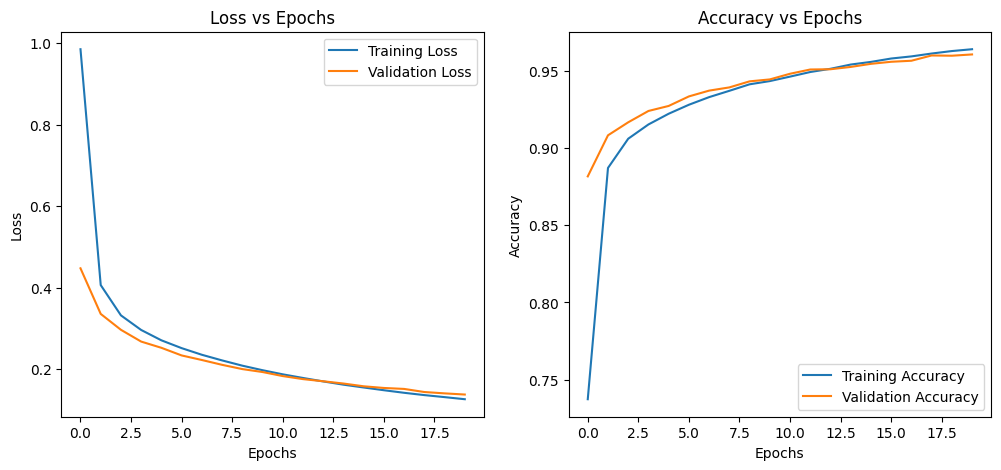

In [6]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()